<h1 style="text-align: center;"> Walmart - Customer Purchase Behaviour</h1>

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [176]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Basic Metrics

In [301]:
wal=pd.read_csv(r"C:\Users\aks75\Downloads\dataset\walmart_data.csv")
wal.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


**User_ID**: User ID

**Product_ID**: Product ID

**Gender**: Sex of User

**Age**: Age in bins

**Occupation**: Occupation(Masked)

**City_Category**: Category of the City (A,B,C)

**StayInCurrentCityYears**: Number of years stay in current city

**Marital_Status**: Marital Status

**ProductCategory**: Product Category (Masked)

**Purchase**: Purchase Amount

In [178]:
wal.shape

(550068, 10)

There are 5,50,068 rows and 10 columns

In [179]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [180]:
wal.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no null values present in our data. 

In [181]:
wal.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

1. User_ID Income is having highest number of unique values.
2. Columns like *Gender,Marital Status,Age,Stay_In_Current_City_Years* have least unique values which can be used for categorical visulization.

**Changing Datatype to Object**

In [182]:
columns=["Occupation","Marital_Status","Product_Category"]
wal[columns]=wal[columns].astype("object")
wal.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

## Statistical Summary

In [183]:
wal.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,NaN,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,NaN,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,NaN,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,1.003029e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,1.727592e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,1.000001e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,1.001516e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


1. Highest purchase age-category is 26-35.
2. Maximum purchase made is 23,961 and mean is 9,263. The maximum piont can be the outlier.


**Changing column value of Marital_Status**

In [184]:
wal["Marital_Status"].replace({0:"Unmarried",1:"Married"},inplace=True)
wal.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,M,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,M,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,M,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,M,46-50,7,B,2,Married,1,15686
9,1000005,P00274942,M,26-35,20,A,1,Married,8,7871


In [292]:
(wal["User_ID"].nunique())

5891

There are total 5891 unique customers.

In [185]:
(wal["Gender"].value_counts(normalize=True)*100).round(2)

M    75.31
F    24.69
Name: Gender, dtype: float64

There are around 75% male and 25% female customers in our data.

In [186]:
(wal["Marital_Status"].value_counts(normalize=True)*100).round(2)

Unmarried    59.03
Married      40.97
Name: Marital_Status, dtype: float64

60% of our customers are Unmarried

In [187]:
(wal["City_Category"].value_counts(normalize=True)*100).round(2)

B    42.03
C    31.12
A    26.85
Name: City_Category, dtype: float64

Around 73% customers live city category B and C

In [188]:
(wal["Age"].value_counts(normalize=True)*100).round(2)

26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64

Around 40% of the population is around 26-35 years of age.

In [299]:
print("Percentage people Stay_In_Current_City_Years")
(wal["Stay_In_Current_City_Years"].value_counts(normalize=True)*100).round(2)

Percentage people Stay_In_Current_City_Years


1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

In [297]:
print("Data by product_Category")
(wal["Product_Category"].value_counts())

Data by product_Category


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

# Visual Analysis
## Univariate Analysis

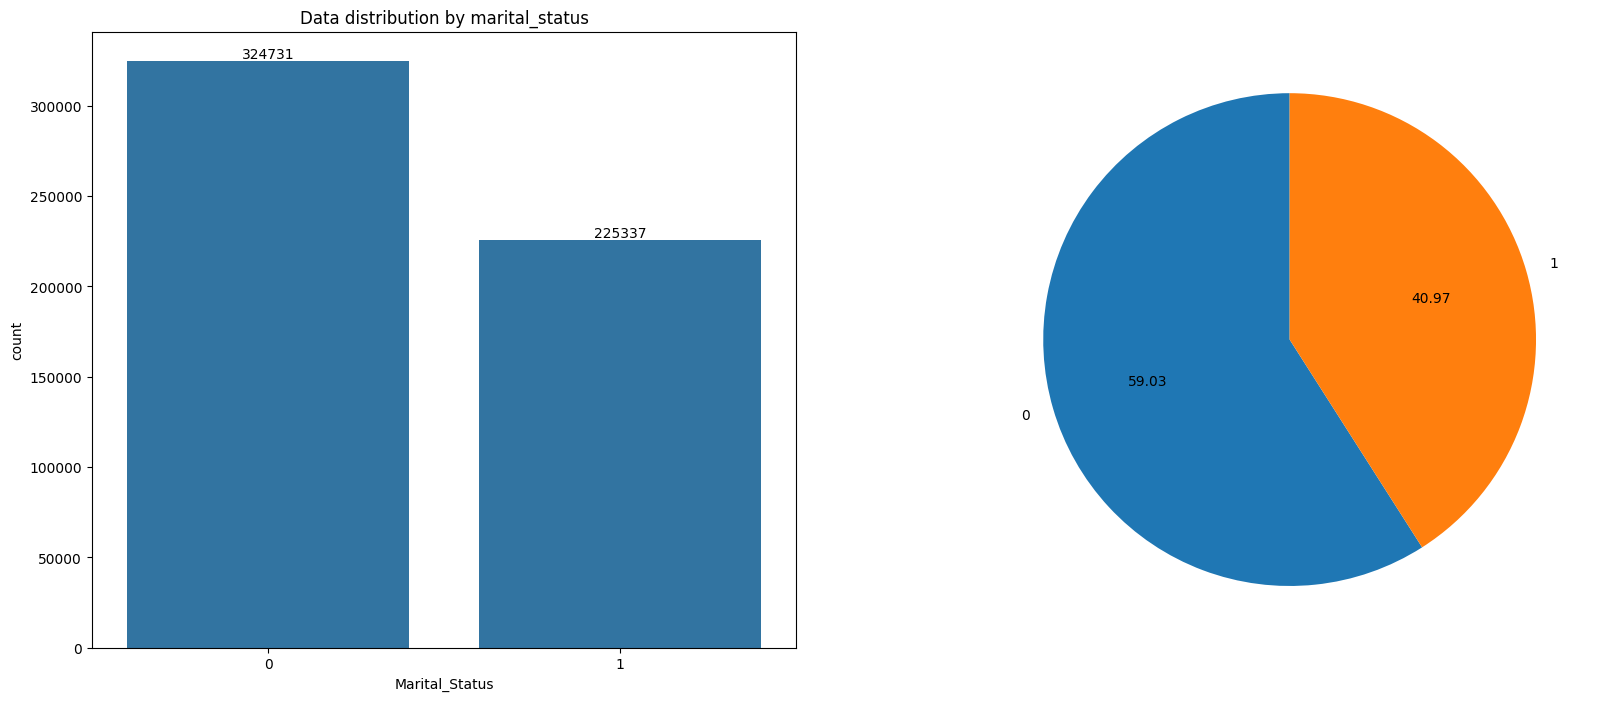

In [307]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax=sns.countplot(data=wal,x="Marital_Status")
plt.title("Data distribution by marital_status")
for bars in ax.containers:
 ax.bar_label(bars)
marriagecount=wal["Marital_Status"].value_counts()
plt.subplot(1,2,2)
plt.pie(
marriagecount,
labels=marriagecount.index,
startangle=90,
autopct="%.2f")
plt.show()

1. There are total 3,34,731(59.03) unmarried customers and 2,25,337(40.97) married customers

## Gender-Wise Analysis

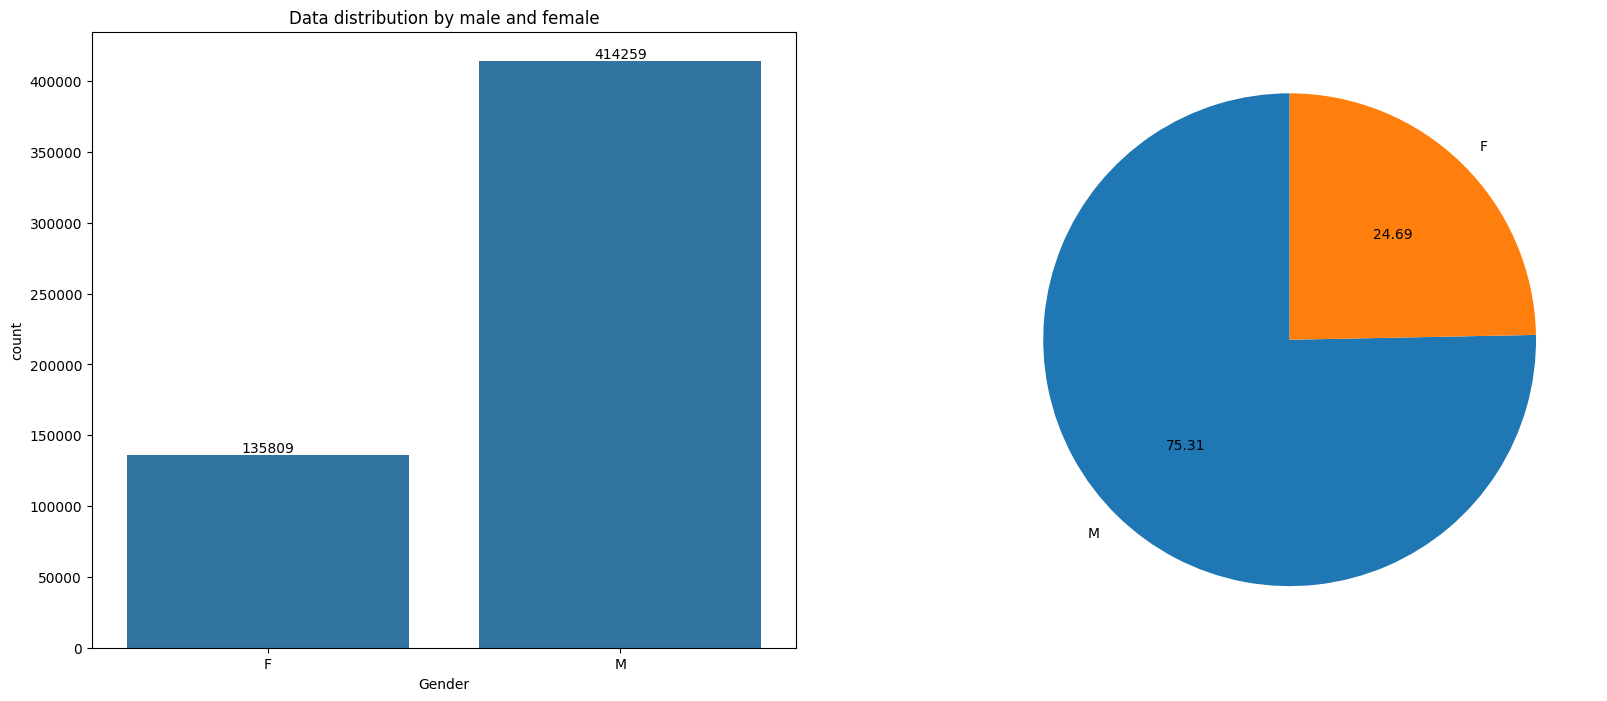

In [306]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax1=sns.countplot(data=wal,x=wal["Gender"])
plt.title("Data distribution by male and female")
for bars in ax1.containers:
    ax1.bar_label(bars)
gendercount=wal["Gender"].value_counts()
plt.subplot(1,2,2)
plt.pie(
gendercount,
labels=gendercount.index,
startangle=90,
autopct="%.2f")
plt.show()

**Insight**
1. Majority of our customers are male(around 75.31%)
2. 24.69% are female.

## Customer distribution by Age

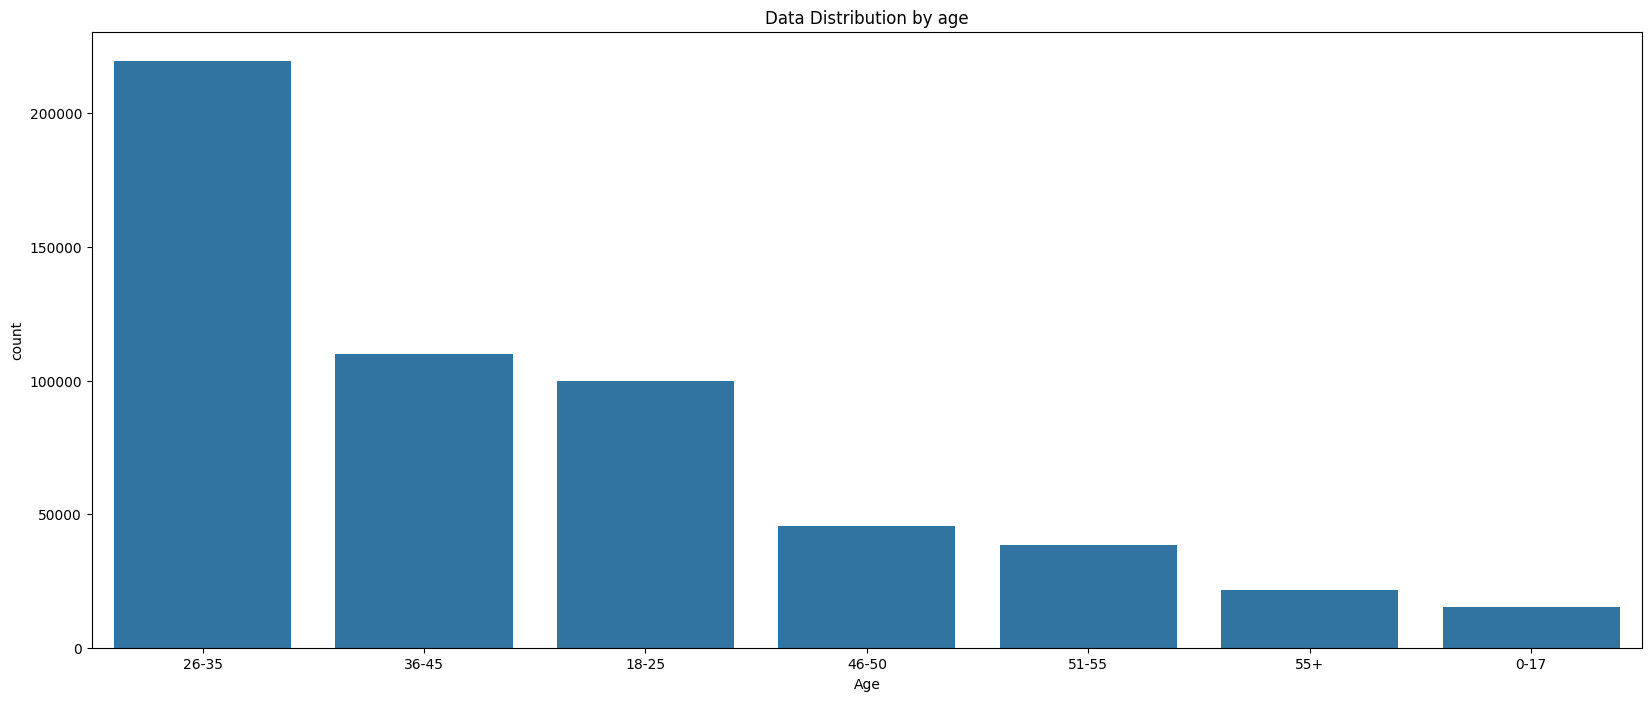

In [294]:
plt.figure(figsize=(20,8))
sns.countplot(data=wal,x=wal["Age"],order=wal["Age"].value_counts().index)
plt.title("Data Distribution by age")
plt.show()

**Insight**
1. Age between 26-35 customers are the highest in the dataset.
2. Age between 0-17 customers which are kids is the lowest.


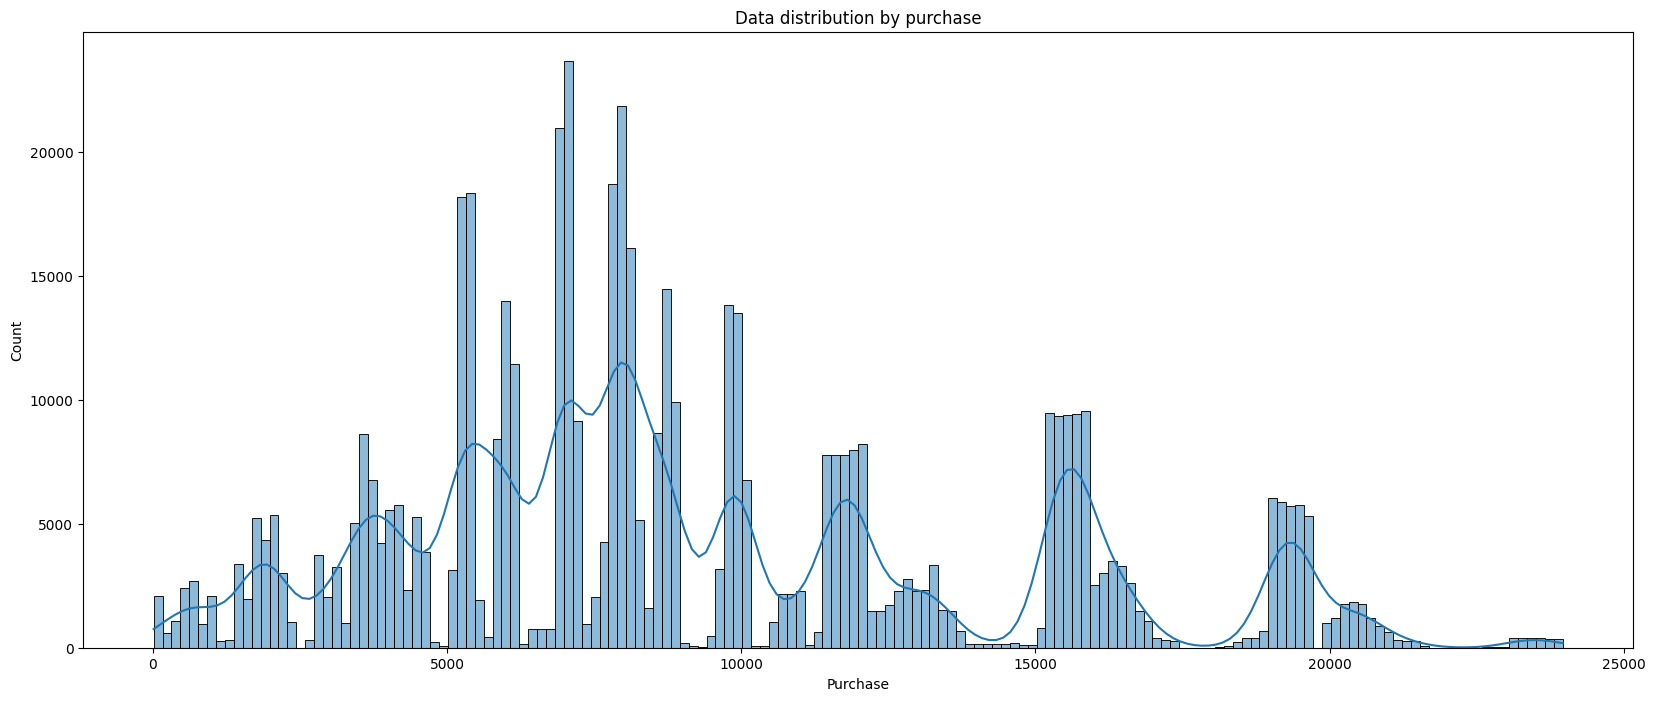

In [295]:
plt.figure(figsize=(20,8))
sns.histplot(data=wal,x=wal["Purchase"],kde=True)
plt.title("Data distribution by purchase")
plt.show()

**Insight**
1. There is a huge spike between 5000-10000 amount, therefore mostly people purchase around that.
2. The smallest purchase 12 and the largest purchase is around 23961.

## Total Customers by Product-Category

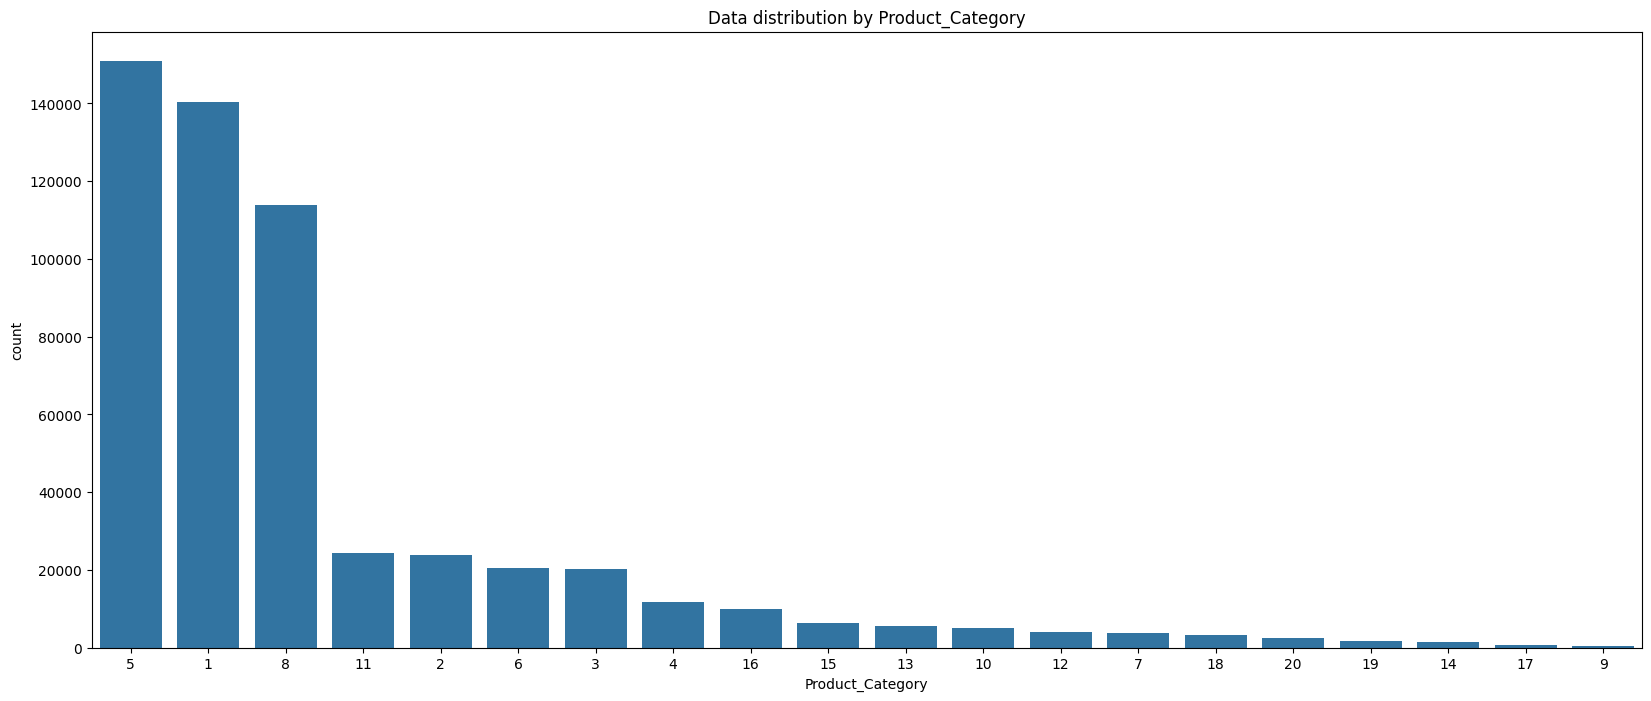

In [296]:
plt.figure(figsize=(20,8))
sns.countplot(data=wal,x=wal["Product_Category"],order=wal["Product_Category"].value_counts().index)
plt.title("Data distribution by Product_Category")
plt.show()

**Insight**
1. Product_category is the highest purchased category which is around 150000.
2. Around 75% of the customers purchsed from product category 5,1,8.

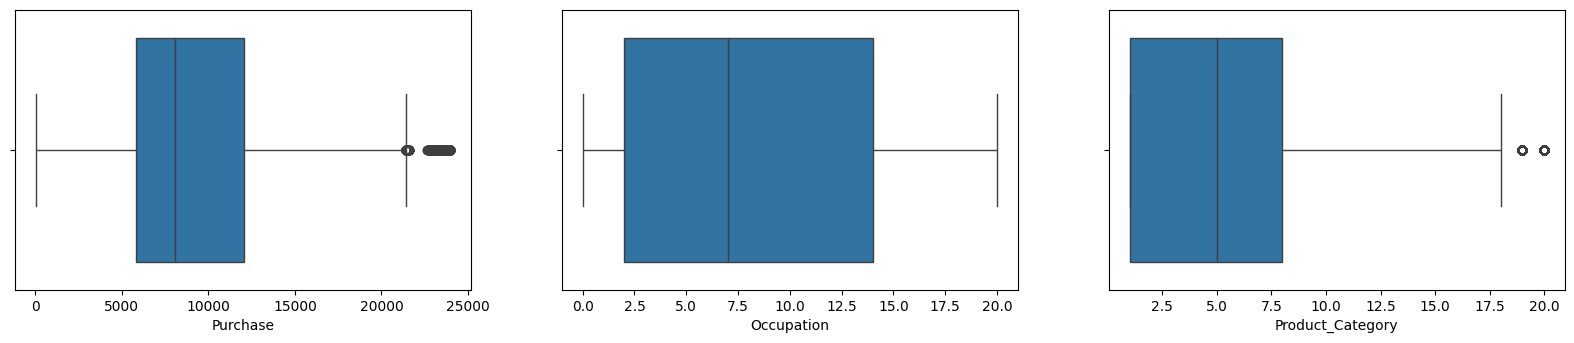

In [247]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.boxplot(data=wal,x="Purchase")
plt.subplot(2,3,2)
sns.boxplot(data=wal,x="Occupation")
plt.subplot(2,3,3)
sns.boxplot(data=wal,x="Product_Category")
plt.show()

**Insight**
1. Purchase have outliers.
2. Occupation does not have outliers and most of the data lies between 2.5 to 13.

## Calculation outlier for Purchase Columns

In [196]:
q1=wal["Purchase"].quantile(0.25)
q3=wal["Purchase"].quantile(0.75)
iqr=q3-q1
print("The statistical summary for the Purchase column is")
print()
print("q1- ",q1)
print("q3- ",q3)
print("iqr- ",iqr)

The statistical summary for the Purchase column is

q1-  5823.0
q3-  12054.0
iqr-  6231.0


**Calculating Upper Bound And Lower Bound**

In [197]:
print("Upper Bound-",q3+1.5*iqr)
print("Lower Bound-",q1-1.5*iqr)
print("Median-",wal["Purchase"].median())

Upper Bound- 21400.5
Lower Bound- -3523.5
Median- 8047.0


In [284]:
print(len(wal.loc[wal["Purchase"]>21400.5])/len(wal)*100)

0.4866671029763593


**Insight**
1. Around 0.49% of Purchase data is outlier.

## Bivariate Analysis

## Gender-Wise Purchase

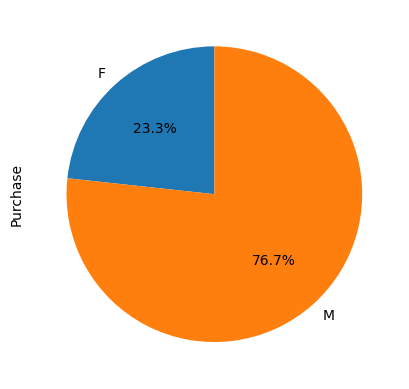

In [236]:
genpurchase=wal.groupby("Gender")["Purchase"].sum().reset_index()
marriagepurchase=wal.groupby("Marital_Status")["Purchase"].sum().reset_index()
genpurchase.plot.pie(y='Purchase', labels=genpurchase['Gender'], autopct='%1.1f%%', startangle=90, legend=None)
plt.show()

**Insight**
1. We see the same trend as we saw in the number of customers.
2. Around 76.7% of purchase made by male and rest by female.

## Marital-Status Wise Purchase 

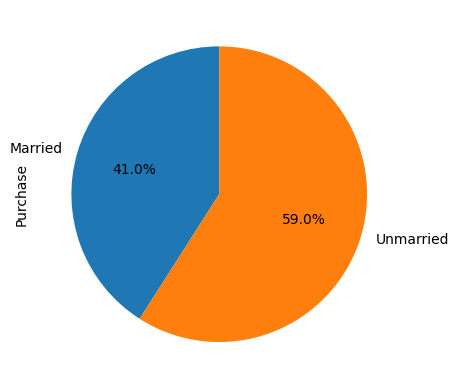

In [224]:
marriagepurchase=wal.groupby("Marital_Status")["Purchase"].sum().reset_index()
marriagepurchase.plot.pie(y="Purchase",labels=marriagepurchase["Marital_Status"],autopct='%1.1f%%',startangle=90,legend=None)
plt.show()

**Insight**

1. We see the same trend as we saw in the number of customers.
2. Around 59% of purchase made by Unmarried and rest by Married.

## Purchase by Age and Occupation

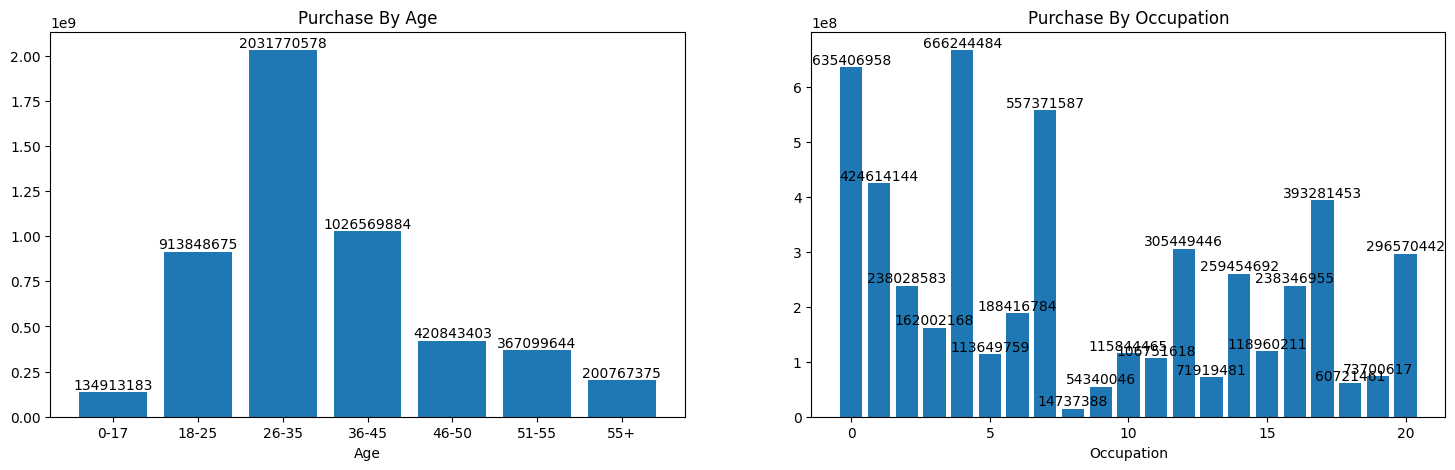

In [274]:
plt.figure(figsize=(18,5))
agepurchase=wal.groupby("Age")["Purchase"].sum().reset_index()
agepurchase.set_index("Age")
plt.subplot(1,2,1)
plt.bar(agepurchase["Age"],agepurchase["Purchase"])
for i, value in enumerate(agepurchase['Purchase']):
    plt.text(i, value + 100000, str(value), ha='center', va='bottom')
plt.xlabel("Age")
plt.title("Purchase By Age")
occupationpurchase=wal.groupby("Occupation")["Purchase"].sum().reset_index()
occupationpurchase.set_index("Occupation")
plt.subplot(1,2,2)
plt.bar(occupationpurchase["Occupation"],occupationpurchase["Purchase"])
for i, value in enumerate(occupationpurchase['Purchase']):
    plt.text(i, value + 100000, str(value), ha='center', va='bottom')
plt.xlabel("Occupation")
plt.title("Purchase By Occupation")
plt.show()

**Insight**
1. Around 2031770578 total puchase amount is spent by age group of people from 26-35, which is nearly the same trend as no. of customers.
2. Occupation with 0,4,7 spent the hughe amount as compare to others.

## Purchase by Age and Occupation

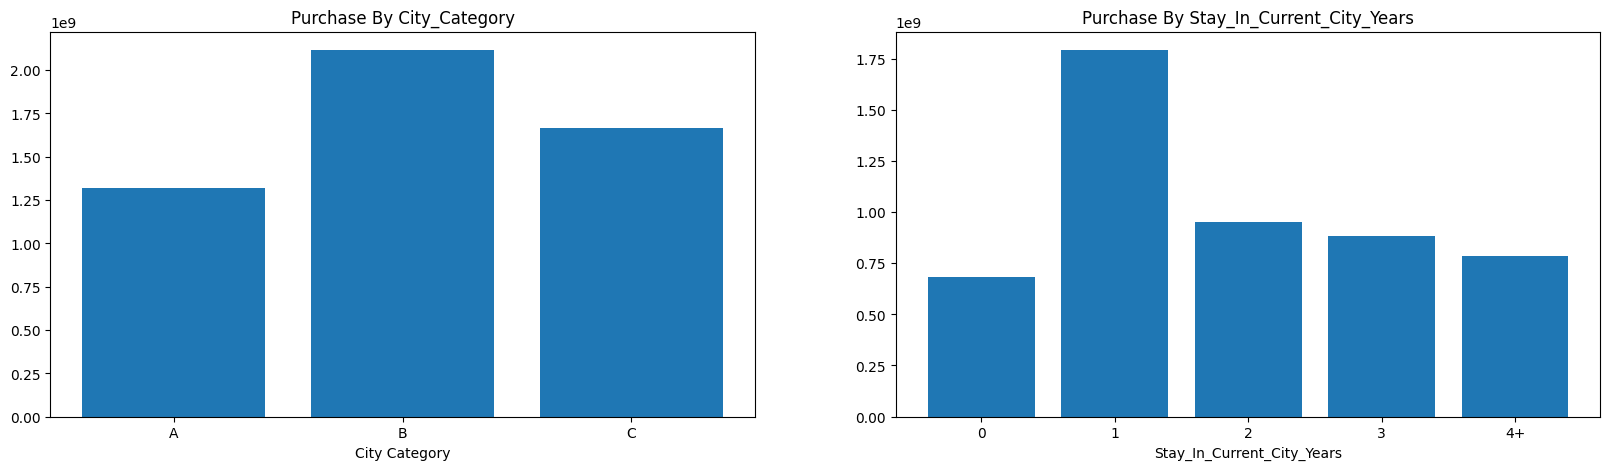

In [271]:
plt.figure(figsize=(20,5))
ccpurchase=wal.groupby("City_Category")["Purchase"].sum().reset_index()
ccpurchase.set_index("City_Category")
plt.subplot(1,2,1)
plt.bar(ccpurchase["City_Category"],ccpurchase["Purchase"])
plt.xlabel("City Category")
plt.title("Purchase By City_Category")
staypurchase=wal.groupby("Stay_In_Current_City_Years")["Purchase"].sum().reset_index()
staypurchase.set_index("Stay_In_Current_City_Years")
plt.subplot(1,2,2)
plt.bar(staypurchase["Stay_In_Current_City_Years"],staypurchase["Purchase"])
plt.title("Purchase By Stay_In_Current_City_Years")
plt.xlabel("Stay_In_Current_City_Years")
plt.show()

**Gender-Wise Purchase(Box-Plot)**

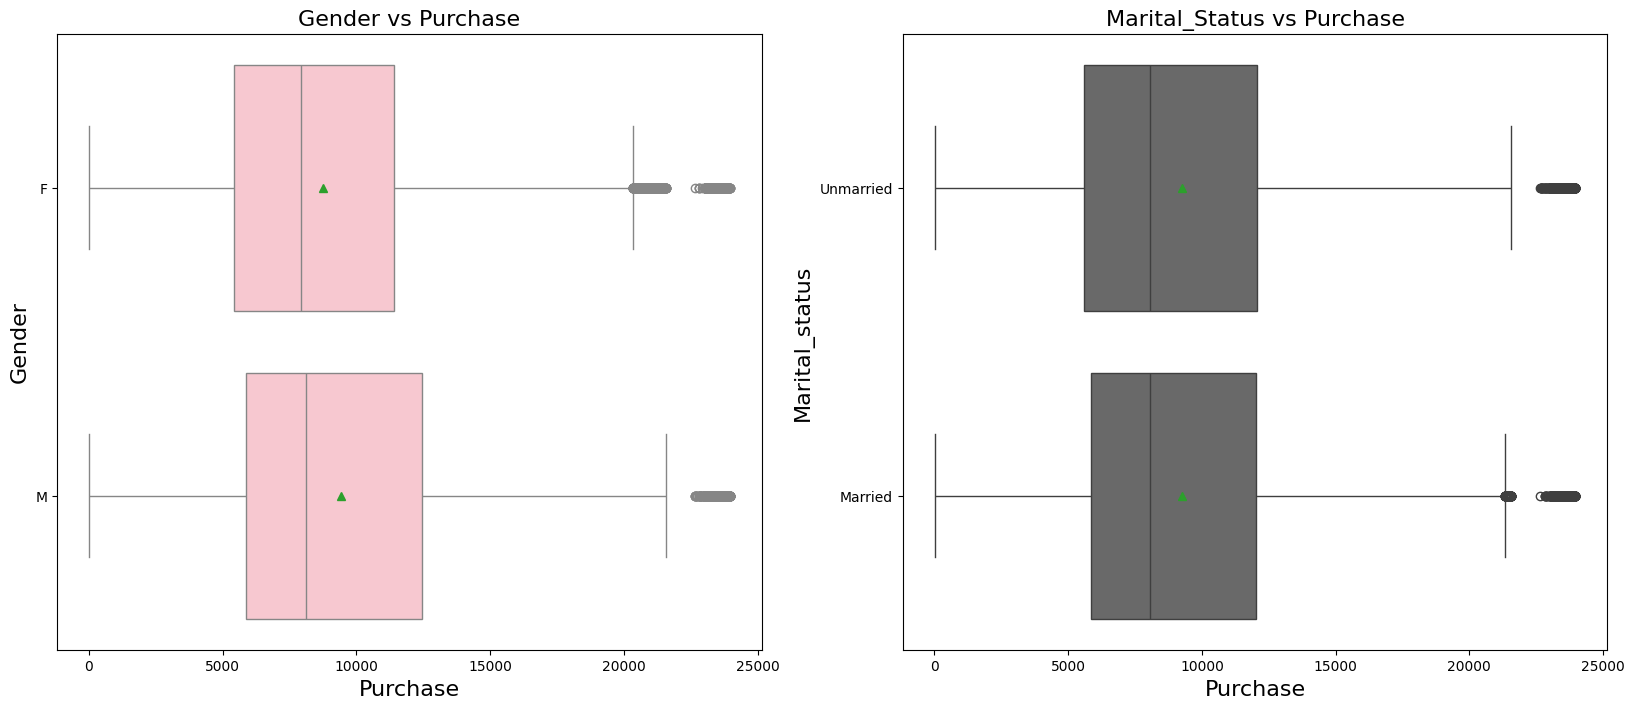

In [200]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=wal, y='Gender',x ='Purchase',showmeans=True,color='pink')
plt.title("Gender vs Purchase", fontsize=16)
plt.xlabel("Purchase", fontsize=16) 
plt.ylabel("Gender", fontsize=16)
plt.subplot(1,2,2)
sns.boxplot(data=wal, y='Marital_Status',x ='Purchase',showmeans=True,color='dimgrey')
plt.title("Marital_Status vs Purchase", fontsize=16)
plt.xlabel("Purchase", fontsize=16) 
plt.ylabel("Marital_status", fontsize=16)
plt.show()

**Insight**
1. Gender vs. Purchase

       a) The median for males and females is almost equal.
       b) Females have more outliers compared to males.
       c) Males purchased more compared to females.
   
2. Martial Status vs. Purchase

       a) The median for married and single people is almost equal.
       b) Outliers are present in both records.


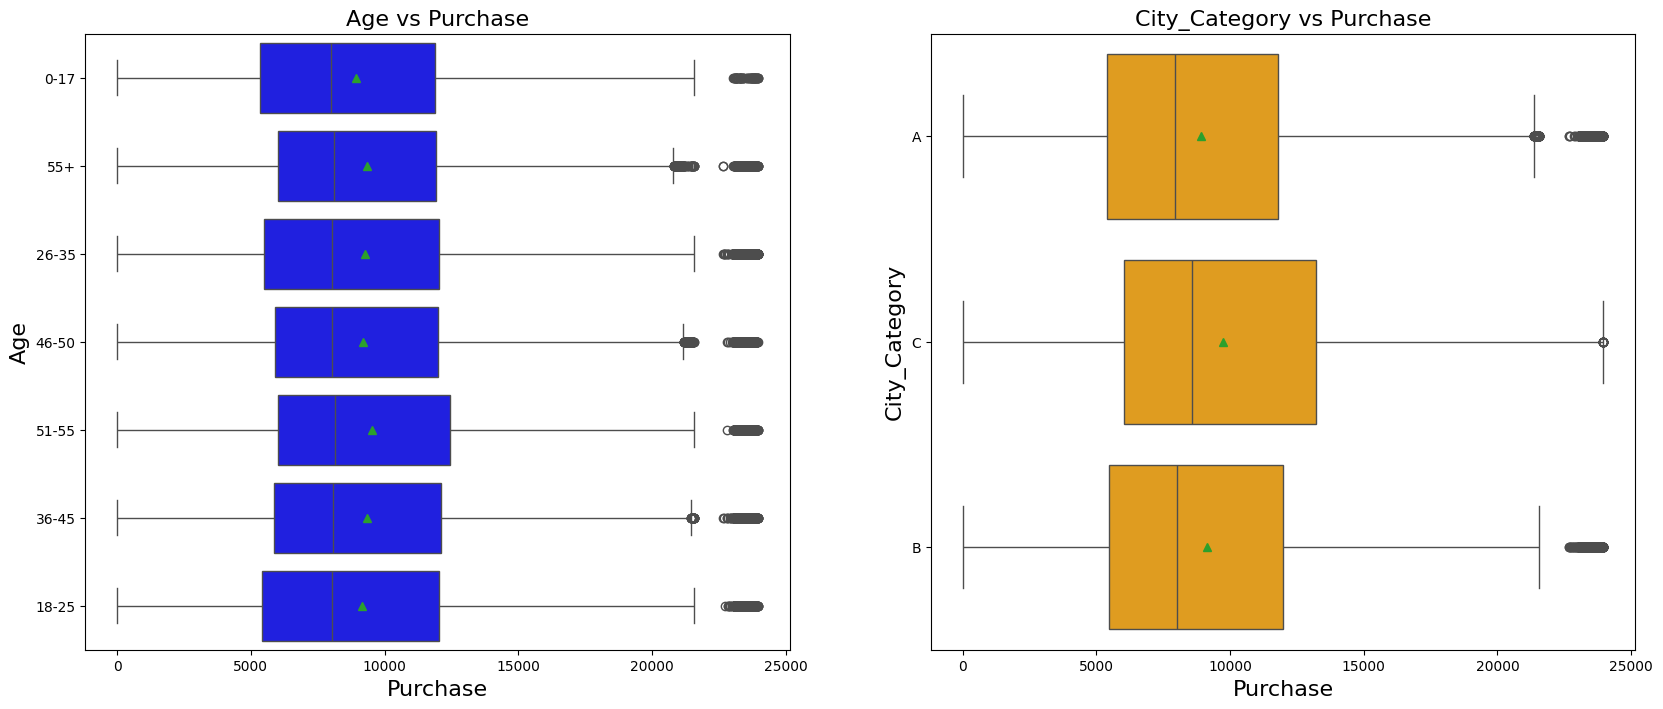

In [201]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data=wal, y='Age',x ='Purchase',showmeans=True,color='blue')
plt.title("Age vs Purchase", fontsize=16)
plt.xlabel("Purchase", fontsize=16) 
plt.ylabel("Age", fontsize=16)
plt.subplot(1,2,2)
sns.boxplot(data=wal, y='City_Category',x ='Purchase',showmeans=True,color='orange')
plt.title("City_Category vs Purchase", fontsize=16)
plt.xlabel("Purchase", fontsize=16) 
plt.ylabel("City_Category", fontsize=16)
plt.show()

**Insight**

3) Age vs. Purchase

       a) The median for all age groups is almost equal.  
       b) Outliers are present in all age groups.
   
4) City Category vs. Purchase

       a) The C city region has very low outliers compared to other cities.
       b) A and B city region medians are almost the same.

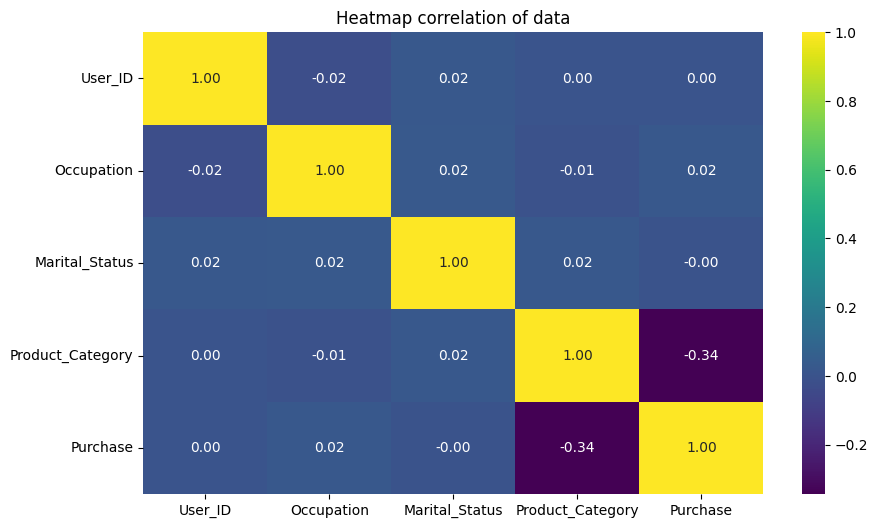

In [303]:
plt.figure(figsize=(10,6))
sns.heatmap(wal.corr(),annot=True,cmap="viridis",fmt='.2f')
plt.title("Heatmap correlation of data")
plt.show()

**Insight**
1. Clearly we can see that there is not much correlation among the columns in data.
2. Pruchase and Product_Category are significantly correlated.

# Questions

## Are women spending more money per transaction than men? Why or Why not?

In [202]:
print("Average spent by male and female")
genmean=wal.groupby("Gender")["Purchase"].mean().round(2)

print(genmean)

Average spent by male and female
Gender
F    8734.57
M    9437.53
Name: Purchase, dtype: float64


In [203]:
walagg=wal.groupby(["User_ID","Gender"])[["Purchase"]].agg({"Purchase":['sum','mean']}).reset_index()
walagg1=walagg.sort_values(by="User_ID",ascending=False).head(10)
walagg1

User_ID Gender Purchase              
                          sum          mean
5890  1006040      M  1653299   9184.994444
5889  1006039      F   590319   7977.283784
5888  1006038      F    90034   7502.833333
5887  1006037      F  1119538   9176.540984
5886  1006036      F  4116058   8007.894942
5885  1006035      F   956645   6293.717105
5884  1006034      M   197086  16423.833333
5883  1006033      M   501843  13940.083333
5882  1006032      M   517261   9404.745455
5881  1006031      F   286374   9237.870968

In [204]:
print('Each gender wise count')
Gender_wise_count=walagg['Gender'].value_counts(normalize=True)*100
Gender_wise_count

Each gender wise count


M    71.719572
F    28.280428
Name: Gender, dtype: float64

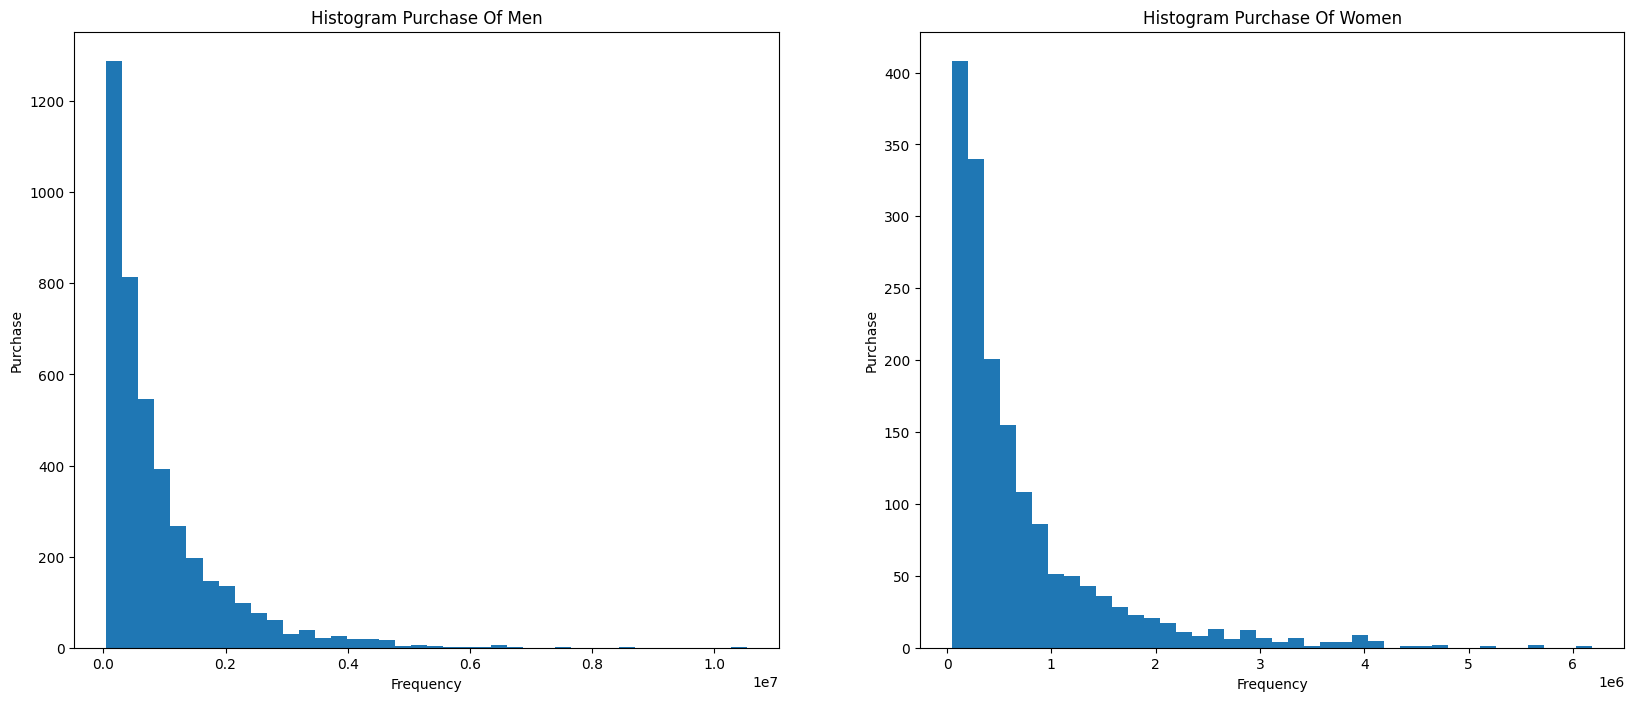

In [288]:
wal_df=wal.groupby(by=["User_ID","Gender"])["Purchase"].sum().reset_index()
wal_df=wal_df.sort_values(by="User_ID",ascending=False)
wal_df1=wal_df.loc[wal_df["Gender"]=="M"]["Purchase"]

#Male Purchase Distribution by histogram
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(wal_df1,bins=40)
plt.title("Histogram Purchase Of Men")
plt.xlabel("Frequency")
plt.ylabel("Purchase")

#Female Purchase Distribution by histogram
plt.subplot(1,2,2)
wal_df2=wal_df.loc[wal_df["Gender"]=="F"]["Purchase"]
plt.hist(wal_df2,bins=40)
plt.title("Histogram Purchase Of Women")
plt.xlabel("Frequency")
plt.ylabel("Purchase")
plt.show()

In [289]:
Mean_by_gender = wal.groupby(['User_ID', 'Gender'])['Purchase'].sum()
Mean_by_gender = Mean_by_gender.reset_index()
Mean_by_gender = Mean_by_gender.sort_values(by='User_ID', ascending=False)
Male_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='M']['Purchase'].mean().round(2)
Female_cust_avg = Mean_by_gender[Mean_by_gender['Gender']=='F']['Purchase'].mean().round(2)
print(f'Male customer average spent amount: {Male_cust_avg}')
print(f'Female customer average spent amount: {Female_cust_avg}')

Male customer average spent amount: 925344.4
Female customer average spent amount: 712024.39


## Confidence Level Interval and means distribution of expenses by Male and Female Customers

Population mean for male->  926598.8263333334
Population mean for female->  708219.889
Sample mean for male->  925344.4023668639
Sample std for male-> 985830.1007953875
Sample mean for female->  712024.3949579832
Sample std for male-> 807370.7261464577


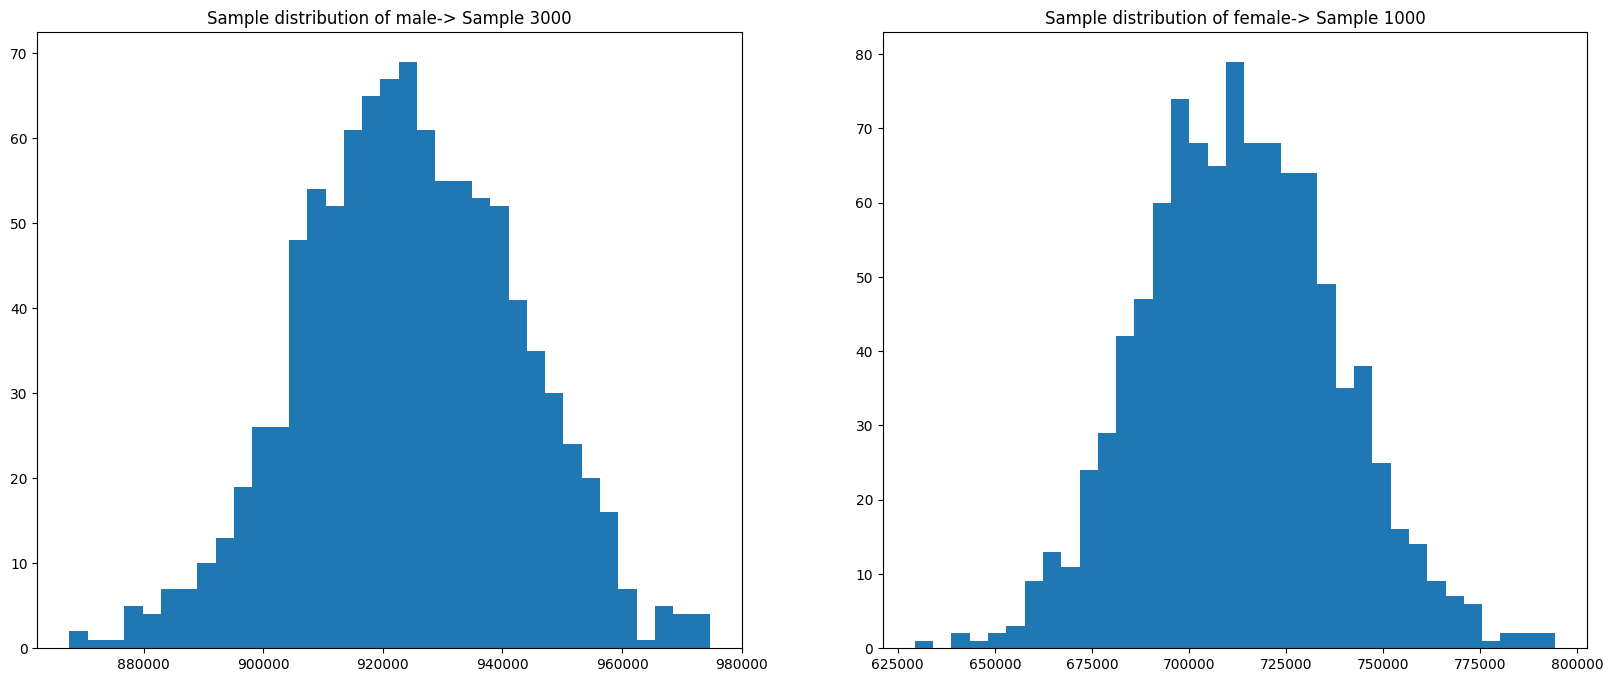

In [207]:
onlymale=wal_df.loc[wal_df["Gender"]=="M"]
onlyfemale=wal_df.loc[wal_df["Gender"]=="F"]

#taking sample size
m_sample_size = 3000
f_sample_size = 1000
num_repitions = 1000

random_samplemale=onlymale.sample(n=m_sample_size)
random_samplefemale=onlyfemale.sample(n=f_sample_size)

pop_m_mean=random_samplemale["Purchase"].mean()
pop_f_mean=random_samplefemale["Purchase"].mean()
print("Population mean for male-> ",pop_m_mean)
print("Population mean for female-> ",pop_f_mean)

rsamplemale_mean=onlymale["Purchase"].mean()
print("Sample mean for male-> ",rsamplemale_mean)
rsamplemale_std=onlymale["Purchase"].std()
print("Sample std for male->",rsamplemale_std)
rsamplefemale_mean=onlyfemale["Purchase"].mean()
print("Sample mean for female-> ",rsamplefemale_mean)
rsamplefemale_std=onlyfemale["Purchase"].std()
print("Sample std for male->",rsamplefemale_std)

male_means1 = []
female_means1 = []

for _ in range(num_repitions):
    male_mean2 = onlymale.sample(m_sample_size,replace=True)['Purchase'].mean()
    female_mean2 = onlyfemale.sample(f_sample_size,replace=True)['Purchase'].mean()
    male_means1.append(male_mean2)
    female_means1.append(female_mean2)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(male_means1,bins=35)
plt.title("Sample distribution of male-> Sample 3000")
plt.subplot(1,2,2)
plt.hist(female_means1,bins=35)
plt.title("Sample distribution of female-> Sample 1000")
plt.show()

Confidence Interval 95% Male: (891321.9974724693, 961875.6551941974)


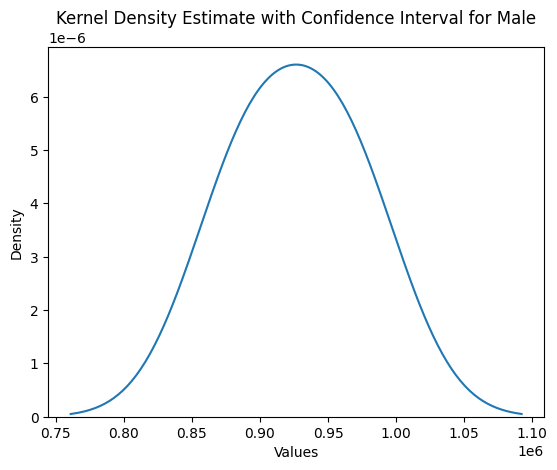

In [208]:
#sample size
sample_size = 3000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = stats.norm.ppf((1 + confidence_level) / 2) 
margin_of_error = z_critical * (rsamplemale_std/ np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = stats.norm.ppf((1 + confidence_level) / 2) 
margin_of_error1 = z_critical * (rsamplefemale_std/ np.sqrt(sample_size))

Male_confidence_interval = (pop_m_mean - margin_of_error,pop_m_mean  + margin_of_error)
print("Confidence Interval 95% Male:", Male_confidence_interval)
sns.kdeplot(Male_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Male')
plt.show()

Confidence Interval 95% Female: (679329.0294994018, 737110.7485005981)


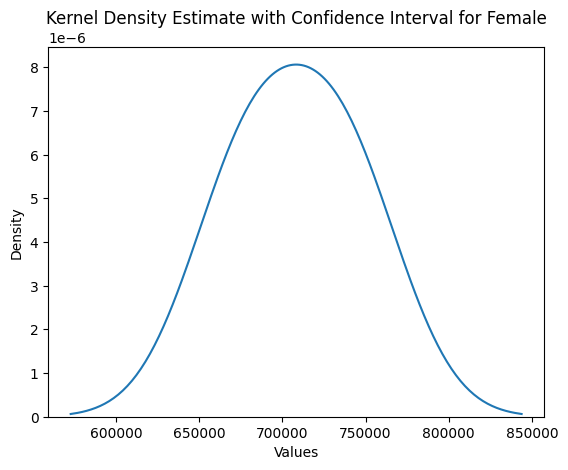

In [209]:
Female_confidence_interval = (pop_f_mean - margin_of_error1, pop_f_mean + margin_of_error1)
print("Confidence Interval 95% Female:", Female_confidence_interval)
sns.kdeplot(Female_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Female')
plt.show()

**Insight**
1) By taking the confidence interval of 95%, we can conclude-

   a) Average amount spent by male in Walmart is 891321.99 to 961875.66
   
   b) Average amount spent by female in Walmart is 679329.03 to 737110.75

2) The confidence interval for both men and women don't overlap.

3) Overall men are spending more than women.

# Results when the same activity is performed for Married vs Unmarried

In [210]:
Marital_Status_sum = wal.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
Marital_Status_sum = Marital_Status_sum.reset_index()
Marital_Status_sum = Marital_Status_sum.sort_values(by='User_ID', ascending=False)
Married_cust_avg = Marital_Status_sum[Marital_Status_sum['Marital_Status']=="Married"]['Purchase'].mean().round(2)
print(f'Married customer average spent amount: {Married_cust_avg}')

Married customer average spent amount: 843526.8


In [211]:
Marital_Status_sum = wal.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum()
Marital_Status_sum = Marital_Status_sum.reset_index()
Marital_Status_sum = Marital_Status_sum.sort_values(by='User_ID', ascending=False)
UnMarried_cust_avg = Marital_Status_sum[Marital_Status_sum['Marital_Status']=="Unmarried"]['Purchase'].mean().round(2)
print(f'Unmarried customer average spent amount: {UnMarried_cust_avg}')

Unmarried customer average spent amount: 880575.78


Population mean: random Unmarried samples mean purchase value: 888111.1856666667
Population mean: random Married samples mean purchase value : 837270.11
Sample means of Unmarried purchase : 880575.78
Sample STD of Unmarried purchase : 949436.25
Sample means of Married purchase : 843526.8
Sample STD of Married purchase : 935352.12


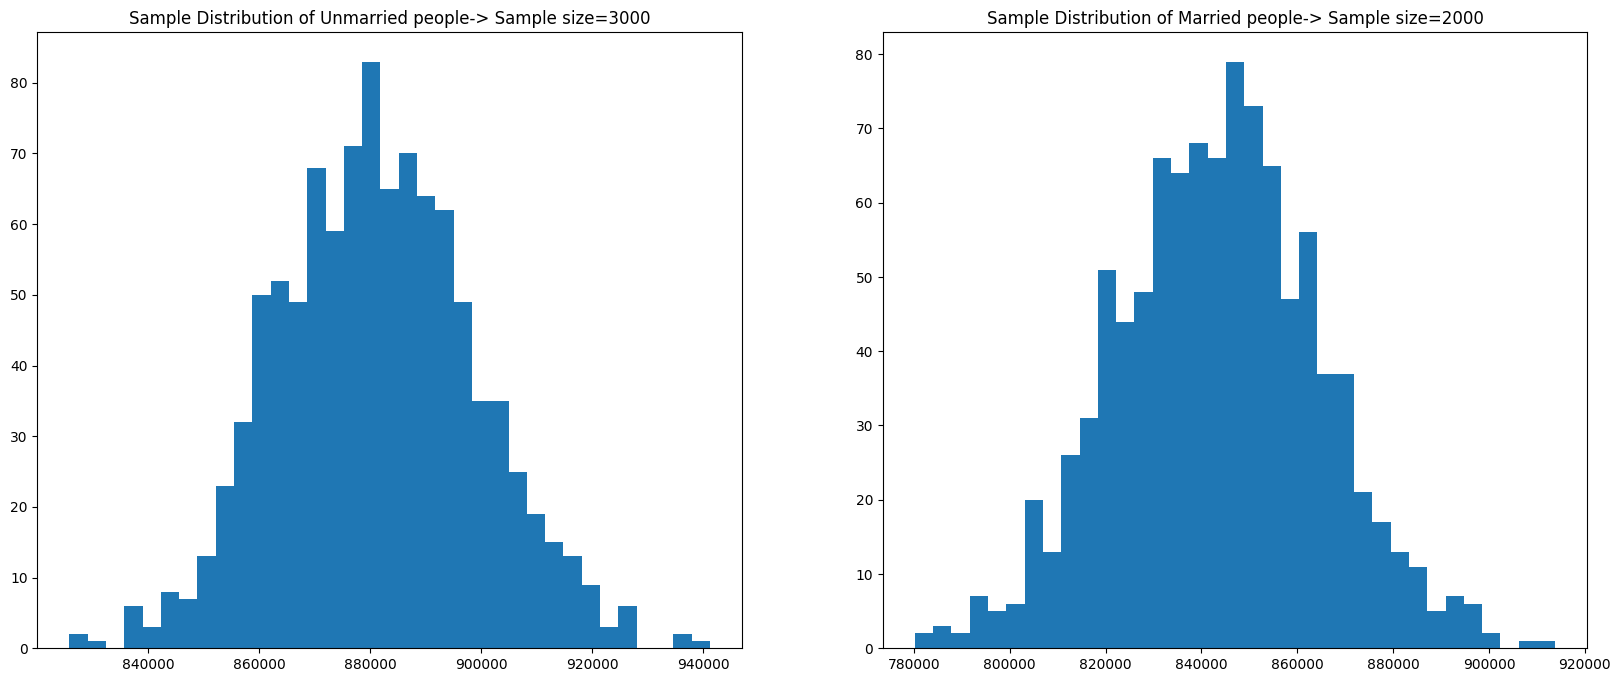

In [214]:
Unmarried_df = Marital_Status_sum[Marital_Status_sum['Marital_Status']=="Unmarried"]
Married_df = Marital_Status_sum[Marital_Status_sum['Marital_Status']=="Married"]
# Taking random sample size from dataframe
Unmarried_sample_size = 3000
Married_sample_size = 2000
num_repitions = 1000
# Taking random sample from unmarried and married dataframe
random_sample_Unmarried = Unmarried_df.sample(n=Unmarried_sample_size)
random_sample_Married = Married_df.sample(n=Married_sample_size)

# Taking mean value from random sample unmarried and married dataframe
Unmarried_means = random_sample_Unmarried['Purchase'].mean()
print(f'Population mean: random Unmarried samples mean purchase value: {Unmarried_means}')
Married_means = random_sample_Married['Purchase'].mean()
print(f'Population mean: random Married samples mean purchase value : {Married_means}')

# Taking sample mean from filtered unmarried dataframe
Unmarried_sample_mean = round(Unmarried_df['Purchase'].mean(),2)
print(f'Sample means of Unmarried purchase : {Unmarried_sample_mean}')
Unmarried_std_value = round(Unmarried_df['Purchase'].std(),2)
print(f'Sample STD of Unmarried purchase : {Unmarried_std_value}')

# Taking sample mean from filtered Married dataframe
Married_sample_mean = round(Married_df['Purchase'].mean(),2)
print(f'Sample means of Married purchase : {Married_sample_mean}')
Married_std_value = round(Married_df['Purchase'].std(),2)
print(f'Sample STD of Married purchase : {Married_std_value}')

# taking blank list to creat histogram
Unmarried_means1 = []
Married_means1 = []
# using for loop to create again mean value for histogram
for _ in range(num_repitions):
    Unmarried_mean2 = Unmarried_df.sample(Unmarried_sample_size,replace=True)['Purchase'].mean()
    Married_mean2 = Married_df.sample(Married_sample_size,replace=True)['Purchase'].mean()
    Unmarried_means1.append(Unmarried_mean2)
    Married_means1.append(Married_mean2)
    
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(Unmarried_means1,bins=35)
plt.title("Sample Distribution of Unmarried people-> Sample size=3000")
plt.subplot(1,2,2)
plt.hist(Married_means1,bins=35)
plt.title("Sample Distribution of Married people-> Sample size=2000")
plt.show()

In [ ]:
#sample size
sample_size = 3000
# Confidence level ( 95% confidence interval)
confidence_level = 0.95
# Calculate the margin of error using the z-distribution for male
z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level
margin_of_error = z_critical * (Unmarried_std_value / np.sqrt(sample_size))
# Calculate the margin of error using the z-distribution for female
z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level
margin_of_error = z_critical * (Married_std_value / np.sqrt(sample_size))


Confidence Interval 95% Unmarried: (845298.951139136, 915852.6088608641)


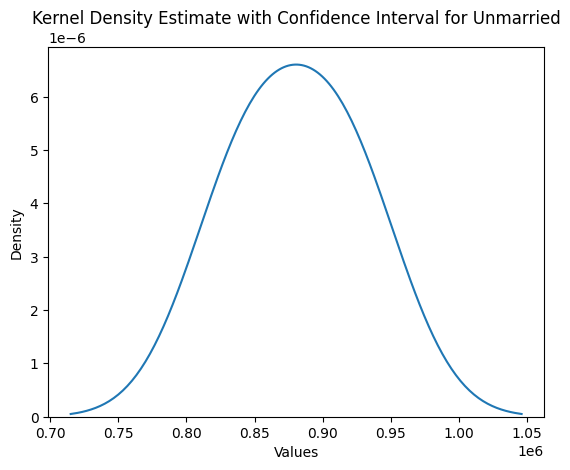

In [215]:
#Calculate the confidence interval for Unmarried and presenting it on the graph
Unmarried_confidence_interval = (Unmarried_sample_mean - margin_of_error, Unmarried_sample_mean + margin_of_error)
print("Confidence Interval 95% Unmarried:", Unmarried_confidence_interval)
sns.kdeplot(Unmarried_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Unmarried')
plt.show()

Confidence Interval 95% Married: (808249.971139136, 878803.6288608641)


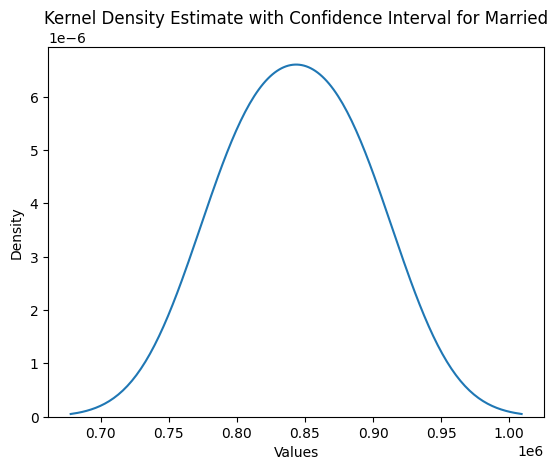

In [216]:
#Calculate the confidence interval for female and presenting it on the graph
Married_confidence_interval = (Married_sample_mean - margin_of_error, Married_sample_mean + margin_of_error)
print("Confidence Interval 95% Married:", Married_confidence_interval)
sns.kdeplot(Married_confidence_interval)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Confidence Interval for Married')
plt.show()

**Insight**

1. By taking the confidence interval of 95%, we can conclude-

            a. Average amount spent by unmarried customers in Walmart is 845298.95 to 915852.61   
            b. Average amount spent by married in Walmart is 679329.03 to 737110      
2. The confidence interval for both married and unmarried couples are overlapping
3. Overall unmarried people are spending more than married.

## Results when the same activity is performed for Age

In [219]:
 def calculate_age_group_means_and_confidence_intervals(wal):
    sum_by_age = wal.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index()
    sum_by_age = sum_by_age.sort_values(by='User_ID', ascending=False)
    # Create dict and filtering data age group wise
    age_groups = {
 'Age_0_17': sum_by_age[sum_by_age['Age'] == '0-17'],
 'Age_18_25': sum_by_age[sum_by_age['Age'] == '18-25'],
 'Age_26_35': sum_by_age[sum_by_age['Age'] == '26-35'],
 'Age_36_45': sum_by_age[sum_by_age['Age'] == '36-45'],
 'Age_46_50': sum_by_age[sum_by_age['Age'] == '46-50'],
 'Age_51_55': sum_by_age[sum_by_age['Age'] == '51-55'],
 'Age_55+': sum_by_age[sum_by_age['Age'] == '55+']
 }
 # Define sample sizes and number of repetitions
    sample_sizes = {
 'Age_0_17': 200,
 'Age_18_25': 1000,
 'Age_26_35': 2000,
 'Age_36_45': 1000,
 'Age_46_50': 500,
 'Age_51_55': 400,
 'Age_55+': 300
 }
    num_repitions = 1000
 # Create a dictionary to store results
    results = {}
 # Perform random sampling and calculate means for each age group
    for age_group, age_df in age_groups.items():
        sample_size = sample_sizes.get(age_group, 0)
        sample_means = []
        for _ in range(num_repitions):
            random_sample = age_df.sample(n=sample_size)
            sample_mean = random_sample['Purchase'].mean()
            sample_means.append(sample_mean)
 # Calculate the population mean, sample mean, and standard deviation
        population_mean = age_df['Purchase'].mean()
        sample_mean_mean = sum(sample_means) / len(sample_means)
        sample_mean_std = pd.Series(sample_means).std()
 # Calculate the confidence interval using the z-distribution
        confidence_level = 0.95 # 95% confidence interval
        z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score for the desired confidence level
        margin_of_error = z_critical * (age_df['Purchase'].std() / np.sqrt(sample_size))
        lower_bound = sample_mean_mean - margin_of_error
        upper_bound = sample_mean_mean + margin_of_error
        results[age_group] = {
            'Population Mean': population_mean,
            'Sample Mean Mean': sample_mean_mean,
            'Sample Mean Std': sample_mean_std,
            'Confidence Interval': (lower_bound, upper_bound)
            }
    return results
results = calculate_age_group_means_and_confidence_intervals(wal)
for age_group, metrics in results.items():
    print(f'{age_group} average spent value, random mean value, std value and Confidence Interval:')
    print(f'{age_group} customer average spent amount: {metrics["Population Mean"]}')
    print(f'Random Sample Mean : {metrics["Sample Mean Mean"]}')
    print(f'Sample Mean Std: {metrics["Sample Mean Std"]}')
    print(f'Confidence Interval: {metrics["Confidence Interval"]}')
    print()


Age_0_17 average spent value, random mean value, std value and Confidence Interval:
Age_0_17 customer average spent amount: 618867.8119266055
Random Sample Mean : 619339.395874999
Sample Mean Std: 13907.397038956777
Confidence Interval: (524119.9592193948, 714558.8325306032)

Age_18_25 average spent value, random mean value, std value and Confidence Interval:
Age_18_25 customer average spent amount: 854863.119738073
Random Sample Mean : 854845.8094950011
Sample Mean Std: 6967.287659187216
Confidence Interval: (799810.6601214614, 909880.9588685408)

Age_26_35 average spent value, random mean value, std value and Confidence Interval:
Age_26_35 customer average spent amount: 989659.3170969313
Random Sample Mean : 989440.7942370009
Sample Mean Std: 3687.096346831034
Confidence Interval: (944229.3179070775, 1034652.2705669242)

Age_36_45 average spent value, random mean value, std value and Confidence Interval:
Age_36_45 customer average spent amount: 879665.7103684661
Random Sample Mean : 

**Insight**

1. By taking the confidence interval of 95%, we can conclude-
                   
       1.The age between 26-35 have the highest purchase mean which ranges from 944229.32 to 1034652.27.
       2. The average amount spent by 36- to 45-year-old customers will lie between 819003.09 and 940678.82.
       3. The average amount spent by 18- to 25-year-old customers will lie between 799594.44 and 909664.74.
       4. The average amount spent by 46- to 50-year-old customers will lie between 711215.10 and 874125.38.
       5. The average amount spent by 51- to 55-year-old customers will lie between 685670.03 and 840962.34.
       6. The average amount spent by 55+ age group customers will lie between 470454.52 and 610200.58.
       7. The lowest average amount spent by 0 to 17-year-old customers will lie between 524534.44 and 714973.32.
           
2. The age between 26-35 spend the most and on the other hand 55+ spent the least.
3. Ages between 36-55 purchase range is overlapping each other.
4. Others age group purchase range don't overlap.

## Conclusion 

1. There are total 5891 unique in which around 75% percent are male and rest are female.
2. Around 74% purchase is done by the male and rest is by the female. By this data we can assume purchasing power is more in male as compared to female.
3. Unmarried couples are spending more money as compare married one.
4. Age between 26-35 are the most frequest buyers in Walmart.
5. Products from category 5 is most purchased one in the dataset.
6. Cities from category B is where most most of the customers resides in.
7. Occupation from 0 and 4 spend a lot of money as compare to other occupation category.

## Recommendations

1. As we know women customer base is way lesser as compare to men. We can run promotion campaign where female related products like cosmetics and clothing should be advertised in discounted price.
2. College students around 18-35 are very frequent buyers, we can use this advantage by running making more profit. Providing exclusive early access to newly released products and some discounts can increase the purchase frequency.
3. Apart from product category 5,1,8 others are not doing good, Walmart should focus more in it by increasing variety and with providing competiting prices.